In [1]:
# Author: Yuki Rivera
# This notebook creates plots for testing graphs in the final report

### Imports libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colorbar as colorbar
import matplotlib.colors as mcolors
from scipy.stats import pearsonr, spearmanr

### Loads the data

In [3]:
df = pd.read_csv('bart_generation_results.csv')

In [4]:
pd.set_option('display.max_colwidth', None)  # No limit on column width


In [ ]:
df[['prompt', 'generated','cosine_similarity','perplexity']]

In [7]:
# Extract data
cos_sim = df["cosine_similarity"].tolist()
ppl = df["perplexity"].tolist()
scores = df["manual_score"].tolist()
x = list(range(len(df)))

### Sets the font size for plots

In [8]:
# Set font sizes
plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
})

### Perplexity vs Manual Score

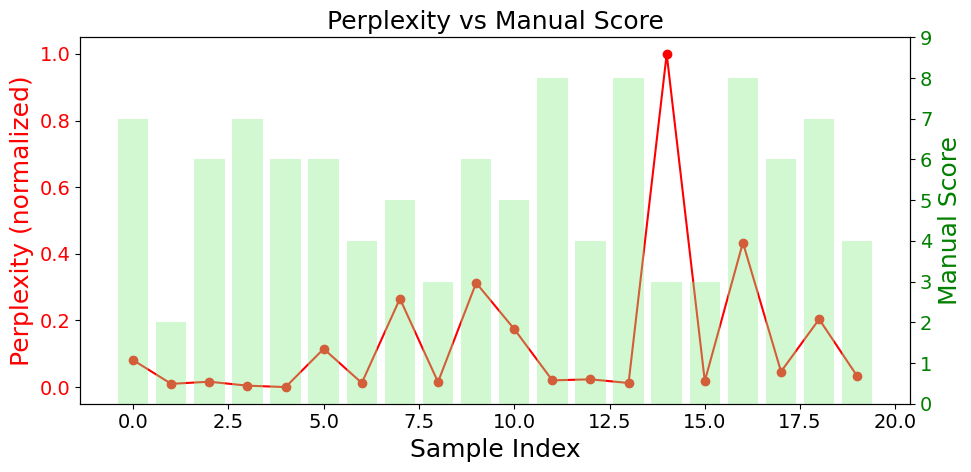

In [9]:
# Normalize perplexity
ppl_normalized = [(p - min(ppl)) / (max(ppl) - min(ppl)) for p in ppl]

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(x, ppl_normalized, color='red', marker='o', label='Perplexity (normalized)')
ax1.set_ylabel('Perplexity (normalized)', color='red')
ax1.set_xlabel('Sample Index')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.bar(x, scores, color='lightgreen', alpha=0.4, label='Manual Score')
ax2.set_ylabel('Manual Score', color='green')
ax2.set_ylim(0, max(scores) + 1)
ax2.tick_params(axis='y', labelcolor='green')

plt.title("Perplexity vs Manual Score")
fig.tight_layout()
fig.savefig("perplexity_manual_dual.png", dpi=300)
plt.show()


### Cosine Similarity vs Manual Score

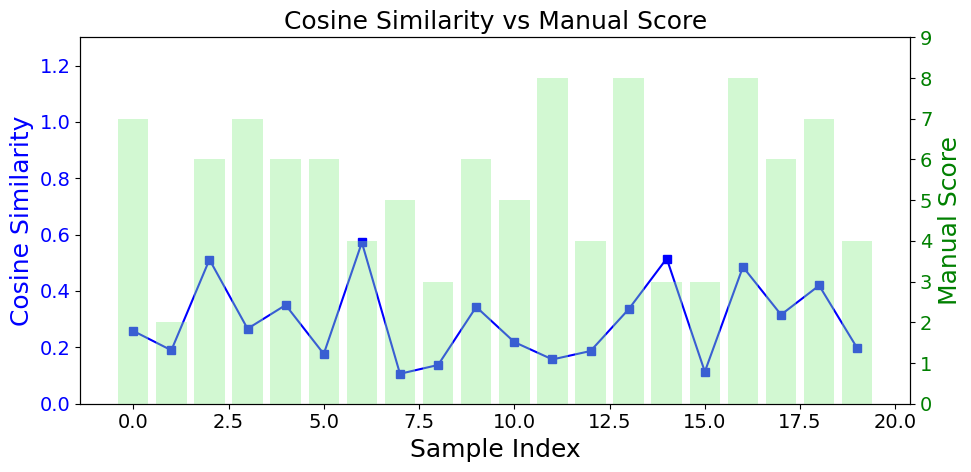

In [10]:

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(x, cos_sim, color='blue', marker='s', label='Cosine Similarity')
ax1.set_ylabel('Cosine Similarity', color='blue')
ax1.set_xlabel('Sample Index')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, 1.3)

ax2 = ax1.twinx()
ax2.bar(x, scores, color='lightgreen', alpha=0.4, label='Manual Score')
ax2.set_ylabel('Manual Score', color='green')
ax2.set_ylim(0, max(scores) + 1)
ax2.tick_params(axis='y', labelcolor='green')

plt.title("Cosine Similarity vs Manual Score")
fig.tight_layout()
fig.savefig("cosine_manual_dual.png", dpi=300)
plt.show()

### Checks the correlations

In [11]:
# Computes correlations for numeric columns only
correlations = df.corr(numeric_only=True)

In [12]:
correlations[['perplexity', 'cosine_similarity', 'manual_score']]

,perplexity,cosine_similarity,manual_score
cosine_similarity,0.403885,1.000000,0.220197
perplexity,1.000000,0.403885,-0.098247
manual_score,-0.098247,0.220197,1.000000


### Create a plot containing all 3 metrics for the report

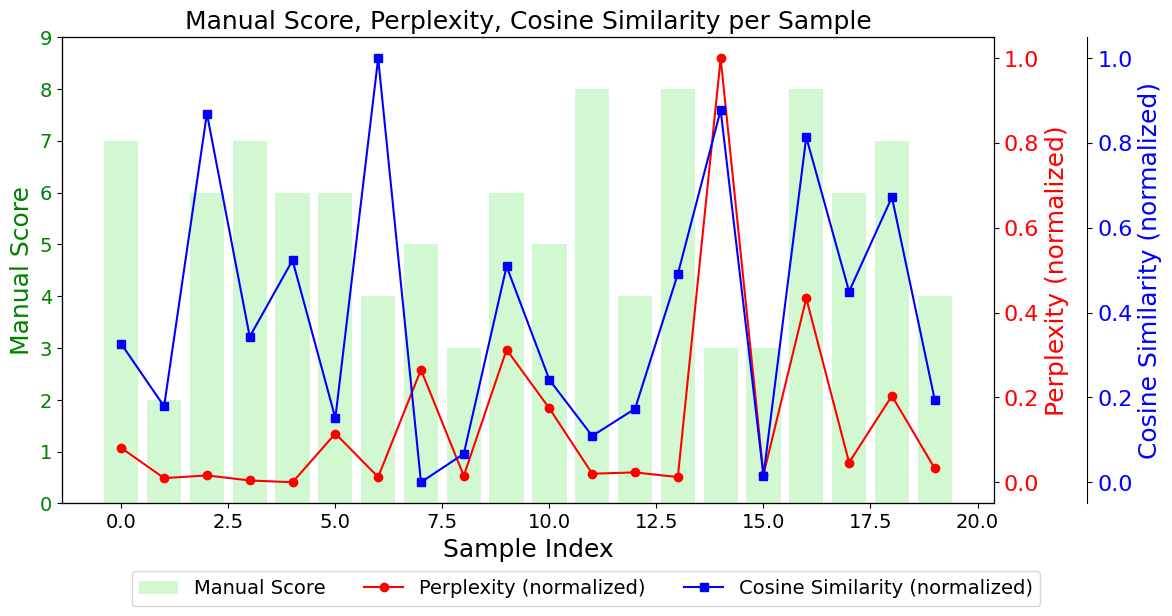

In [13]:
# Normalize perplexity and cosine similarity
ppl_normalized = [(p - min(ppl)) / (max(ppl) - min(ppl)) for p in ppl]
cos_sim_normalized = [(c - min(cos_sim)) / (max(cos_sim) - min(cos_sim)) for c in cos_sim]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Sets font sizes
plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 14,
})

# Manual Score on ax1 (left)
ax1.bar(x, scores, color='lightgreen', alpha=0.4, label='Manual Score')
ax1.set_ylabel('Manual Score', color='green')
ax1.set_xlabel('Sample Index')
ax1.set_ylim(0, max(scores) + 1)
ax1.tick_params(axis='y', labelcolor='green')

# Perplexity line on ax2 (right)
ax2 = ax1.twinx()
ax2.plot(x, ppl_normalized, color='red', marker='o', label='Perplexity (normalized)')
ax2.set_ylabel('Perplexity (normalized)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Cosine similarity on ax3 (further right)
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
ax3.plot(x, cos_sim_normalized, color='blue', marker='s', label='Cosine Similarity (normalized)')
ax3.set_ylabel('Cosine Similarity (normalized)', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')

# Combines all legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
fig.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3,
           loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3)

# Disables the grid for cleaner plot
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

plt.title("Manual Score, Perplexity, Cosine Similarity per Sample")
fig.tight_layout()
fig.savefig("metrics_aligned_right.png", dpi=300)
plt.show()
